<a href="https://colab.research.google.com/github/paulobmsousa/AI_Py_Examples/blob/main/QC_DeutshJozsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Libraries install
!pip install pylatexenc
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit_ibm_runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=a12ce9f33d835dbc7ef5fdc4b651680477cbeef90c3f3f8b61bbbf7b5705fbc5
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import package libraries
import qiskit
print(qiskit.__version__)
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit_ibm_runtime import(
    QiskitRuntimeService,
    EstimatorV2 as Estimator,
    QiskitRuntimeService
)
from qiskit.transpiler.preset_passmanagers import generate_embed_passmanager
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit.visualization import plot_histogram


2.0.1


In [4]:
oracleType, oracleValue = np.random.randint(2), np.random.randint(2)
n = 23 # Number of qubits
if oracleType==0:
  print('The oracle returns a constant value: ', oracleValue)
else:
  print('The oracle returns a balanced function')
  a = np.random.randint(1,2**n) # Parameter to be used later in the balanced function


The oracle returns a balanced function


In [6]:
# Initialize the circuit
qr = QuantumRegister(n+1)
cr = ClassicalRegister(n)
circuitName = 'DeutshJozsa'
djCircuit = QuantumCircuit(qr, cr) # Quantum circuit object using quantum and classical bits
# Step 1 - Apply not gate in the last qubit
djCircuit.x(qr[n])
# Step 2 - Hadamard over all other qubitys
for i in range(n+1):
  djCircuit.h(qr[i])
djCircuit.barrier()
# Step 3 - Apply the function
if oracleType==0:
  if oracleValue==1:
    djCircuit.x(qr[n])
  else:
    djCircuit.id(qr[n])
else:
  for i in range(n):
    if (a & (1<<i)):
      djCircuit.cx(qr[i], qr[n])
djCircuit.barrier()
# Step 4 - Final Hadamard sequence
for i in range(n):
  djCircuit.h(qr[i])
djCircuit.barrier()
# Step final - measurement
for i in range(n):
  djCircuit.measure(qr[i], cr[i])


In [8]:
djCircuit.draw(output='text', scale=.25)

┌───┐      ░                                                        »
 q1_0: ┤ H ├──────░───■────────────────────────────────────────────────────»
       ├───┤      ░   │                                                    »
 q1_1: ┤ H ├──────░───┼────────────────────────────────────────────────────»
       ├───┤      ░   │                                                    »
 q1_2: ┤ H ├──────░───┼────────────────────────────────────────────────────»
       ├───┤      ░   │                                                    »
 q1_3: ┤ H ├──────░───┼────────────────────────────────────────────────────»
       ├───┤      ░   │                                                    »
 q1_4: ┤ H ├──────░───┼────────────────────────────────────────────────────»
       ├───┤      ░   │                                                    »
 q1_5: ┤ H ├──────░───┼────────────────────────────────────────────────────»
       ├───┤      ░   │                                                    »
 q1_6: ┤ H ├──────░───┼────■───────────────────────────────────────────────»
       ├───┤      ░   │    │                                               »
 q1_7: ┤ H ├──────░───┼────┼────■──────────────────────────────────────────»
       ├───┤      ░   │    │    │                                          »
 q1_8: ┤ H ├──────░───┼────┼────┼────■─────────────────────────────────────»
       ├───┤      ░   │    │    │    │                                     »
 q1_9: ┤ H ├──────░───┼────┼────┼────┼─────────────────────────────────────»
       ├───┤      ░   │    │    │    │                                     »
q1_10: ┤ H ├──────░───┼────┼────┼────┼────■────────────────────────────────»
       ├───┤      ░   │    │    │    │    │                                »
q1_11: ┤ H ├──────░───┼────┼────┼────┼────┼────■───────────────────────────»
       ├───┤      ░   │    │    │    │    │    │                           »
q1_12: ┤ H ├──────░───┼────┼────┼────┼────┼────┼───────────────────────────»
       ├───┤      ░   │    │    │    │    │    │                           »
q1_13: ┤ H ├──────░───┼────┼────┼────┼────┼────┼───────────────────────────»
       ├───┤      ░   │    │    │    │    │    │                           »
q1_14: ┤ H ├──────░───┼────┼────┼────┼────┼────┼────■──────────────────────»
       ├───┤      ░   │    │    │    │    │    │    │                      »
q1_15: ┤ H ├──────░───┼────┼────┼────┼────┼────┼────┼────■─────────────────»
       ├───┤      ░   │    │    │    │    │    │    │    │                 »
q1_16: ┤ H ├──────░───┼────┼────┼────┼────┼────┼────┼────┼────■────────────»
       ├───┤      ░   │    │    │    │    │    │    │    │    │            »
q1_17: ┤ H ├──────░───┼────┼────┼────┼────┼────┼────┼────┼────┼────■───────»
       ├───┤      ░   │    │    │    │    │    │    │    │    │    │       »
q1_18: ┤ H ├──────░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────■──»
       ├───┤      ░   │    │    │    │    │    │    │    │    │    │    │  »
q1_19: ┤ H ├──────░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
       ├───┤      ░   │    │    │    │    │    │    │    │    │    │    │  »
q1_20: ┤ H ├──────░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
       ├───┤      ░   │    │    │    │    │    │    │    │    │    │    │  »
q1_21: ┤ H ├──────░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
       ├───┤      ░   │    │    │    │    │    │    │    │    │    │    │  »
q1_22: ┤ H ├──────░───┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
       ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐»
q1_23: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├»
       └───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
c1: 23/════════════════════════════════════════════════════════════════════»
                                                                           »
«                  ░ ┌───┐ ░ ┌─┐                                             »
«

{'10011111100110111000001': 1000}


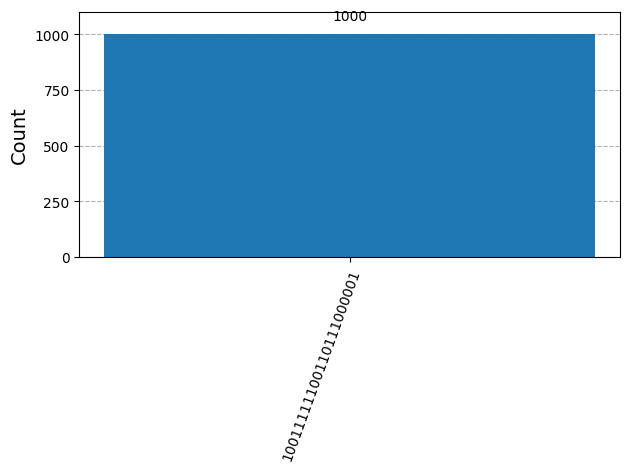

{'10011111100110111000001': 1.0}


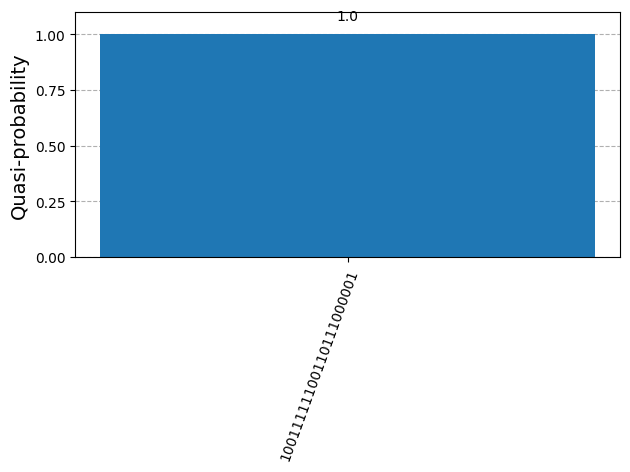

In [31]:
# Backend setup
# Load API key from JSON file
##import json
##with open("apikey.json", "r") as file:
##    data = json.load(file)
##    api_key = data["apikey"]
# Save and load the account
##service = QiskitRuntimeService(channel='ibm_quantum', token=api_key)
##backend_sim = service.get_backend('ibm_qasm_simulator')
##backend_qc = service.get_backend('ibm_brisbane')
##backend = backend_sim
##transpiled_circuit = transpile(djCircuit, backend=backend)
##job = backend.run(transpiled_circuit, shots=1000)
##results = job.result()
##answer = results.get_counts()
##threshold = int(0.01*shots) # Threshold for ploting significant measurements
##filteredAnswer = {k: v for k,v in answer.items() if v>=threshold} # filter answer for better view
##removedCounts = np.sum([v for k,v in answer.items() if v < threshold]) # number of counts removed
##filteredAnswer['other_bitstrings'] = removedCounts # new indexes after removing
##plot_histogram(filteredAnswer)

from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
# Creating simulator in qasm
backend = AerSimulator()
job = backend.run(djCircuit, shots=1000)
results = job.result()
# Counting results
counts = results.get_counts()
print(counts)
display(plot_histogram(counts))
# Calculating statistics
total = sum(counts.values())
probabilities = {state: count / total for state, count in counts.items()}
print(probabilities)
display(plot_histogram(probabilities))
##plt.show()

In [ ]:
plot_histogram(counts)
plt.show()